In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import copy
plt.style.use('seaborn-dark')

In [2]:
"""Importing France crime dataset, per month from 1996 to 2021
sheet_name=None selects all sheets"""
df=pd.read_excel('crime.xlsx', sheet_name=None)
#                   header=0, names=None, index_col=None, usecols=None, squeeze=False, 
#                   dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, 
#                   skipfooter=0, convert_float=True, mangle_dupe_cols=True, storage_options=None)

In [3]:
print(df)   #dictionary
tot=(df['France_Entière'])
metro=(df['France_Métro'])
type(tot), type(metro), len(tot), len(metro)

{'France_Entière':      Index                                      libellé index  _2021_02  \
0        1             Règlements de compte entre malfaireurs         7   
1        2       Homicides pour voler et à l'occasion de vols         1   
2        3                     Homicides pour d'autres motifs        49   
3        4  Tentatives d'homicides pour voler et à l'occas...         8   
4        5          Tentatives homicides pour d'autres motifs       258   
..     ...                                                ...       ...   
102    103  Infractions à l'exercice d'une profession règl...       122   
103    104  Infractions au droit de l'urbanisme et de la c...       438   
104    105                                   Fraudes fiscales        70   
105    106            Autres délits économiques et financiers      1564   
106    107                                      Autres délits     12843   

     _2021_01  _2020_12  _2020_11  _2020_10  _2020_09  _2020_08  _2020_07  \
0  

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame, 107, 107)

In [4]:
crime_reason=list(tot['libellé index'])

In [5]:
tot=tot.drop(columns=['Index', 'libellé index', '_2021_02', '_2021_01'])
metro=metro.drop(columns=['Index', 'libellé index', '_2021_02', '_2021_01'])

In [6]:
"""The departments 1-95, 971-978, 986-988 data"""
dep=[]
for key, value in df.items():
    dep.append(key)
dep=dep[2:]  # because the first two are total and metro
print(dep)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '971', '972', '973', '974', '975', '976', '977', '978', '986', '987', '988']


In [7]:
"""reversing to have 2000 first, to 2021"""
tot=tot.iloc[:,::-1]
metro=metro.iloc[:,::-1]
print(tot,metro)

     _2000_01  _2000_02  _2000_03  _2000_04  _2000_05  _2000_06  _2000_07  \
0          11         5         9         2         5        12         5   
1           2         5         6         7         4         4         5   
2          60        96        70        76        77        62        75   
3           7        10         9         5        14        14        10   
4          65        91       104        63       106        85       101   
..        ...       ...       ...       ...       ...       ...       ...   
102       128        86        64        77        65        51        62   
103       170       176       174       209       166       171       217   
104        36        44        50        40        43        35        26   
105       137       154       191       188       180       154       130   
106      5510      6557      7039      5975      6456      6356      6124   

     _2000_08  _2000_09  _2000_10  ...  _2020_03  _2020_04  _2020_05  \
0  

In [8]:
"""Summing every 12 elements in each row to get avg per year"""
tot_sum_row = tot.groupby([[i//12 for i in range(0,len(tot.columns))]], axis = 1).sum()
metro_sum_row = metro.groupby([[i//12 for i in range(0,len(metro.columns))]], axis = 1).sum()

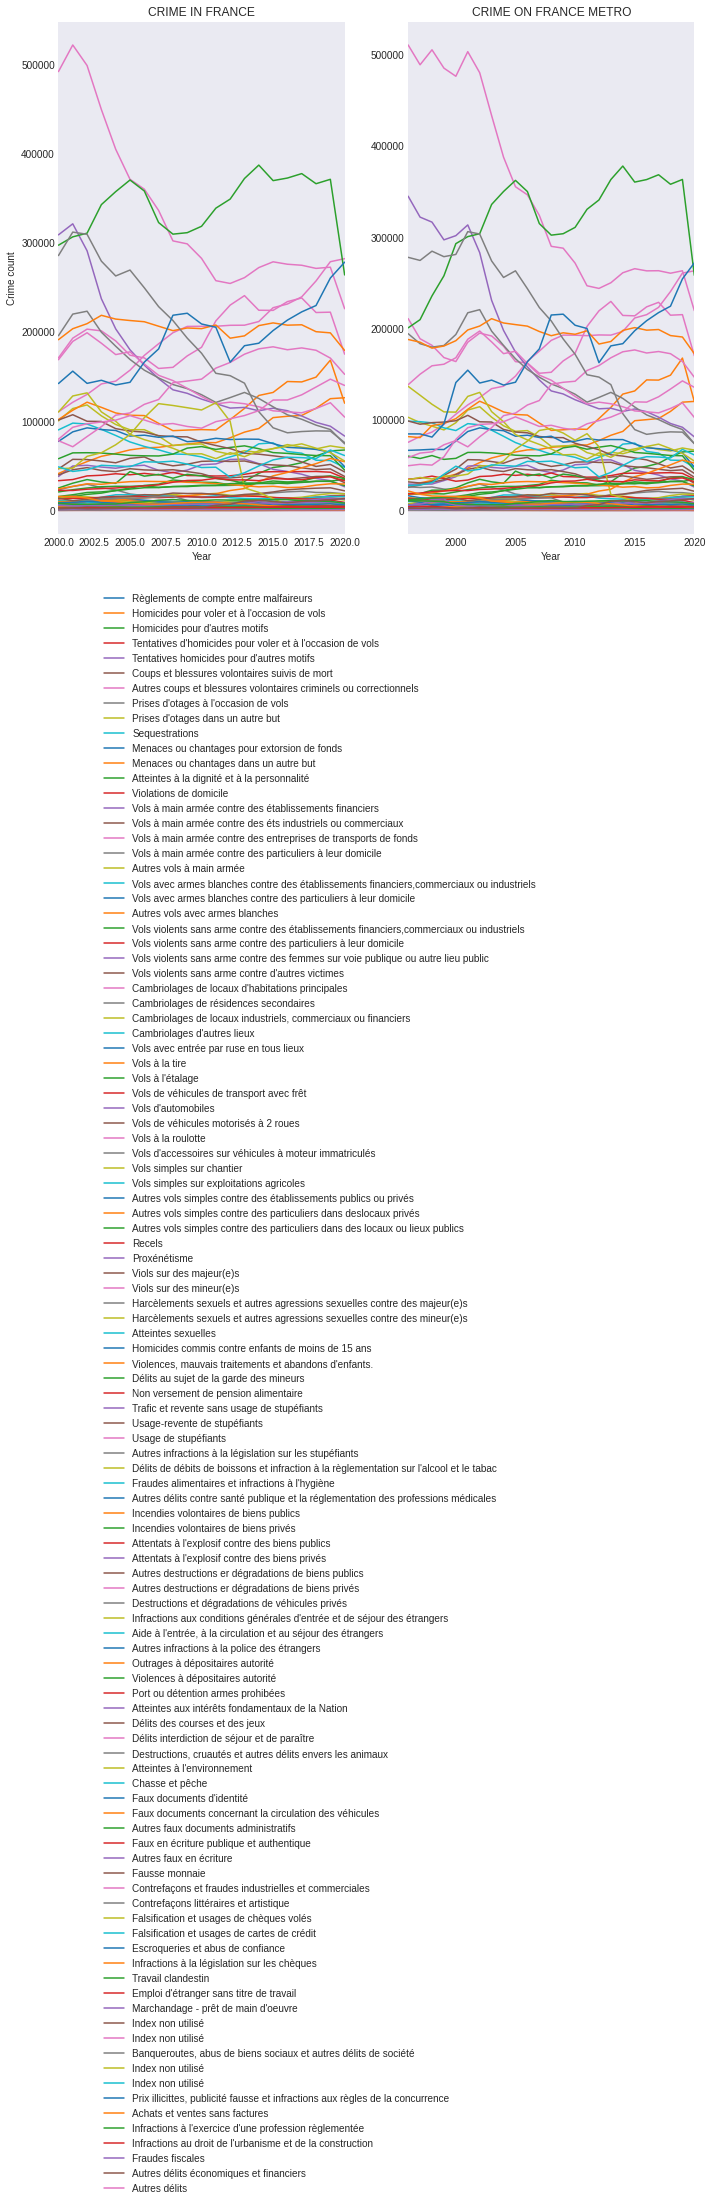

In [9]:
year=list(range(1996, 2021))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

for i in range(len(crime_reason)):
    ax[0].plot(year[4:len(year)], tot_sum_row.iloc[i], label=crime_reason[i])
for i in range(len(crime_reason)):
    ax[1].plot(year[0:len(year)], metro_sum_row.iloc[i])
    
ax[0].set_title("CRIME IN FRANCE")
ax[1].set_title("CRIME ON FRANCE METRO")
ax[0].set_ylabel("Crime count")
ax[0].set_xlabel("Year")
ax[1].set_xlabel("Year")
ax[0].set_xlim(2000,2020)
ax[1].set_xlim(1996,2020)
fig.tight_layout()
ax[0].legend(loc='best',bbox_to_anchor=(0, 0, 1.7, -0.1), fontsize=10)    
plt.show()
plt.close()

No handles with labels found to put in legend.


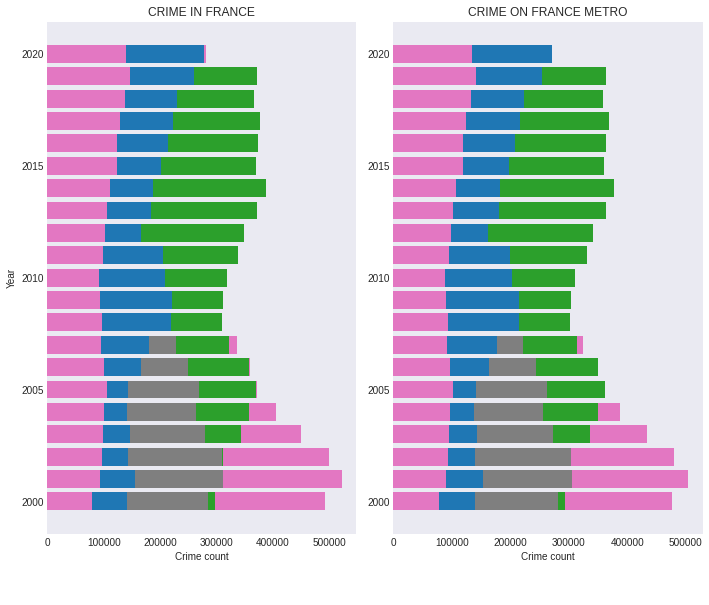

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

for i in range(len(crime_reason)):
    ax[0].barh(year[4:len(year)], tot_sum_row.iloc[i])
for i in range(len(crime_reason)):
    ax[1].barh(year[4:len(year)], metro_sum_row.iloc[i][4:], label='_nolegend_')
    
ax[0].set_title("CRIME IN FRANCE")
ax[1].set_title("CRIME ON FRANCE METRO")
ax[0].set_xlabel("Crime count")
ax[0].set_ylabel("Year")
ax[1].set_xlabel("Crime count")
# ax[0].set_xlim(2000,2020)
# ax[1].set_xlim(1996,2020)
fig.tight_layout()
ax[0].legend(loc='best',bbox_to_anchor=(0, 0, 1.7, -0.1), fontsize=10)    
plt.show()
plt.close()

In [11]:
tot_sum_col=tot.sum(axis = 0, skipna = True)
metro_sum_col=metro.sum(axis = 0, skipna = True)

In [12]:
tot_sum_col

_2000_01    285800
_2000_02    299474
_2000_03    331817
_2000_04    294781
_2000_05    341197
             ...  
_2020_08    310153
_2020_09    327112
_2020_10    317650
_2020_11    277753
_2020_12    285750
Length: 252, dtype: int64

In [13]:
# """Removing index, type of crime and the 2021 since it is messy otherwise"""
# tot_sum_col=tot_sum_col[4:]
# metro_sum_col=metro_sum_col[4:]

In [14]:
len(tot_sum_col), len(metro_sum_col)

(252, 300)

In [15]:
"""grouping months to have only year
n is the number of columns you want to group together
m is the total number of columns being grouped"""
tot_sum_col = tot_sum_col.groupby([[i//12 for i in range(0,len(tot_sum_col))]], axis = 0).sum()
metro_sum_col = metro_sum_col.groupby([[i//12 for i in range(0,len(metro_sum_col))]], axis = 0).sum()

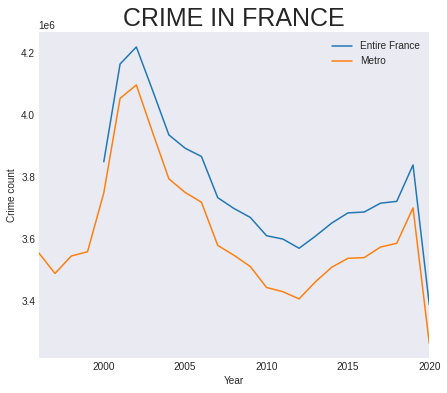

In [16]:
plt.figure(figsize=(7,6))
plt.plot(year[4:len(year)], tot_sum_col, label="Entire France")
plt.plot(year[0:len(year)], metro_sum_col, label="Metro")
plt.ylabel("Crime count")
plt.xlabel("Year")
plt.xlim(1996, 2020)
plt.legend()
plt.title("CRIME IN FRANCE", size=25)
plt.show()
plt.close()

In [17]:
"""Making a copy of the whole df dictionary so not to edit original one"""
dep_crime_list=[]
dep_df = copy.deepcopy(df)
for i in range(len(dep)):
    dep_df[dep[i]]=dep_df[dep[i]].drop(columns=['Index', 'libellé index', '_2021_02', '_2021_01'])
    dep_df[dep[i]]=dep_df[dep[i]].iloc[:, ::-1]
    dep_sum_col = dep_df[dep[i]].sum(axis = 0, skipna = True)
    dep_sum_col = dep_sum_col.groupby([[i//12 for i in range(0,len(dep_sum_col))]], axis = 0).sum()
    print(len(dep_sum_col))
    dep_crime_list.append(dep_sum_col)
    

25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
21
21
21
21
21
21
16
16
18
21
21


In [18]:
"""Creating map with color intensity for cases of crime
change year range to get appropriate maps"""

import pygal 
from pygal.maps import fr

for l in range(0, len(year), 10):
    fr_chart = pygal.maps.fr.Departments(human_readable=True)
#     fr_chart.title = 'Year '+str(year[l])
    
#         print(dep_crime_list[i][l], dep[i], year[l])
    fr_chart.add('In '+ str(year[l])+'', {
                 str(dep[i]): dep_crime_list[i][l] for i in range(len(dep[:-11]))})

    fr_chart.render()
    # fr_chart.render_to_file('france.svg')
    fr_chart.render_to_png('france_crime'+str(year[l])+'.png')

In [19]:
len(year)

25